# Eindopdracht Data-science opleiding
## Deel 2 Beschrijvende statistiek

In [1]:
###
# importeren van benodigde packages
###
import os
import pickle

import pandas as pd
import numpy as np
import matplotlib.pyplot as pl
import matplotlib as mpl
%matplotlib inline
import math

from datetime import datetime
from datetime import date

In [2]:
# Berekening van het gemiddelde van een lijst
def Gemiddelde(lijst):
    som = 0.0
    for waarde in lijst:
         som += waarde
    return som / len(lijst) 

# Som van kwadrateren van elementen van een lijst
def SomVanKwadraten(lijst):
    somv = 0.0
    for waarde in lijst:
         somv += waarde**2
    return somv

# Som van vermenigvuldiging van twee lijsten (x1*y1 + x2*y2 + ... + xn*yn)
def LijstVerm(lijst1,lijst2):
    res=[a*b for a,b in zip(lijst1,lijst2)]
    return sum(res)
    
# Bereken de correlatie coefficient
def CorrCoef(x,y):
    n=len(y)
    Gx=Gemiddelde(x)
    Gy=Gemiddelde(y)
    LV=LijstVerm(x,y)
    Kx=SomVanKwadraten(x)
    Ky=SomVanKwadraten(y)
    deler=LV-n*Gx*Gy
    noemer=(math.sqrt(Kx-n*Gx**2)*math.sqrt(Ky-n*Gy**2))  
    return deler/noemer

#Datum naar integer
def to_integer(lijst):
    return [10000*datum.year + 100*datum.month + datum.day for datum in lijst]


## Inlezen data

In [3]:
FBC_df = pickle.load( open( "Fitbit_schoon.pkl", "rb" ) )
FBC_df.columns

Index(['T_Nr', 'Datum', 'Stap', 'Afst', 'dateOnly', 'weekdag', 'uur', 'maand',
       'week'],
      dtype='object')

In [4]:
print(type(FBC_df))

<class 'pandas.core.frame.DataFrame'>


## Statistische analyse
Beschrijving van gemiddelde, median, modus, standaard deviatie, minimum en maximum van stappen.

Stappen is de onafhankelijk variabele de overige gegevens zijn tijd of afgeleid/berekend op basis van de stappen.


In [5]:
fitbits_l=FBC_df['T_Nr'].unique()

#### Gemiddelde, standaard deviatie (std) max en min van Stap

In [6]:
for t in fitbits_l:
    treatment_b=FBC_df['T_Nr']==t
    FBCT_df=FBC_df[treatment_b]
    print(str(t)+' describe stap: ')
    print('----------------------------')
    print(str(FBCT_df['Stap'].describe()))

1119 describe stap: 
----------------------------
count    272160.000000
mean         12.624783
std          30.454401
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         359.000000
Name: Stap, dtype: float64
1120 describe stap: 
----------------------------
count    267840.000000
mean          6.386675
std          19.132122
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         435.000000
Name: Stap, dtype: float64
1121 describe stap: 
----------------------------
count    128160.000000
mean          7.148393
std          18.238919
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         168.000000
Name: Stap, dtype: float64
1122 describe stap: 
----------------------------
count    86400.000000
mean        13.262905
std         27.967318
min          0.000000
25%          0.000000
50%          0.000000
75%          7.000000
max        15

In [7]:
for t in fitbits_l:
    treatment_b=FBC_df['T_Nr']==t
    FBCT_df=FBC_df[treatment_b]
    stap_b=FBCT_df['Stap']>0
    FBCTS_df=FBCT_df[stap_b]
    print(str(t)+' describe stap: ')
    print('----------------------------')
    print(str(FBCTS_df['Stap'].describe()))

1119 describe stap: 
----------------------------
count    64477.000000
mean        53.289716
std         41.807659
min          1.000000
25%         16.000000
50%         39.000000
75%        100.000000
max        359.000000
Name: Stap, dtype: float64
1120 describe stap: 
----------------------------
count    49459.000000
mean        34.586364
std         31.732144
min          1.000000
25%         11.000000
50%         23.000000
75%         46.000000
max        435.000000
Name: Stap, dtype: float64
1121 describe stap: 
----------------------------
count    30297.000000
mean        30.238571
std         26.626734
min          1.000000
25%         11.000000
50%         22.000000
75%         40.000000
max        168.000000
Name: Stap, dtype: float64
1122 describe stap: 
----------------------------
count    23246.000000
mean        49.295148
std         33.629577
min          1.000000
25%         18.000000
50%         43.000000
75%         77.000000
max        150.000000
Name: Stap, dty

Totaal aantal observaties per kandidaat en bij filters Stap > 0

In [8]:
for t in fitbits_l:
    treatment_b=FBC_df['T_Nr']==t
    FBCT_df=FBC_df[treatment_b]
    stap_b=FBCT_df['Stap']>0
    FBCTS_df=FBCT_df[stap_b]
    print('Aantal observaties met stappen vanaf nul en boven nul '+'voor '+ str(t)+': '+str(FBCT_df['T_Nr'].count()) + ' ' + str(FBCTS_df['T_Nr'].count()))

Aantal observaties met stappen vanaf nul en boven nul voor 1119: 272160 64477
Aantal observaties met stappen vanaf nul en boven nul voor 1120: 267840 49459
Aantal observaties met stappen vanaf nul en boven nul voor 1121: 128160 30297
Aantal observaties met stappen vanaf nul en boven nul voor 1122: 86400 23246
Aantal observaties met stappen vanaf nul en boven nul voor 1123: 240480 44669
Aantal observaties met stappen vanaf nul en boven nul voor 1124: 105120 27030
Aantal observaties met stappen vanaf nul en boven nul voor 1125: 86400 18286


##### Aantal observaties, gemiddelde, standaard deviatie, min en max

||1119||1120||1121||1122||1123||1124||1125||
|-----|-|-|-|-|
|Alle|272160||267840||128160||86400||240480||105120||86400||
|Stappen > 0|64477|24%|49459|18%|30297|24%|23246|27%|44669|19%|27030|26%|18286|21%|

Zoals is te zien maakt de rust (stappen = 0) een groot deel uit van de metingen. 

|		STAPPEN|||||||||
|-|-|---------|--|||||-------|||||||
|T_Nr|#rows|mean|std|min|25%|50%|75%|max|
|1119|64477|53.289716|41.807659|1|16|39|100|359|
|1120|49459|34.586364|31.732144|1|11|23|46 |435|
|1121|30297|30.238571|26.626734|1|11|22|40 |168|
|1122|23246|49.295148|33.629577|1|18|43|77 |150|
|1123|44669|39.75464 |33.441217|1|13|27|61 |194|
|1124|27030|34.570699|29.973392|1|11|24|48 |172|
|1125|18286|42.097506|38.841079|1|11|25|65 |162|

##### Medianen en modus

In [9]:
for t in fitbits_l:
    treatment_b=FBC_df['T_Nr']==t
    FBCT_df=FBC_df[treatment_b]
    stap_b=FBCT_df['Stap']>0
    FBCTS_df=FBCT_df[stap_b]
    print(t)
    print('Mediaan bij alle waarden voor Stap: '+str(FBCT_df['Stap'].median()))
    print('Mediaan bij waarden >0 voor Stap: '+str(FBCTS_df['Stap'].median()))
    print('Modus bij alle waarden voor Stap: '+str(FBCT_df['Stap'].mode()))
    print('Modus bij waarden >0 voor Stap: '+str(FBCTS_df['Stap'].mode()))

1119
Mediaan bij alle waarden voor Stap: 0.0
Mediaan bij waarden >0 voor Stap: 39.0
Modus bij alle waarden voor Stap: 0    0.0
dtype: float64
Modus bij waarden >0 voor Stap: 0    7.0
dtype: float64
1120
Mediaan bij alle waarden voor Stap: 0.0
Mediaan bij waarden >0 voor Stap: 23.0
Modus bij alle waarden voor Stap: 0    0.0
dtype: float64
Modus bij waarden >0 voor Stap: 0    7.0
dtype: float64
1121
Mediaan bij alle waarden voor Stap: 0.0
Mediaan bij waarden >0 voor Stap: 22.0
Modus bij alle waarden voor Stap: 0    0.0
dtype: float64
Modus bij waarden >0 voor Stap: 0    7.0
dtype: float64
1122
Mediaan bij alle waarden voor Stap: 0.0
Mediaan bij waarden >0 voor Stap: 43.0
Modus bij alle waarden voor Stap: 0    0.0
dtype: float64
Modus bij waarden >0 voor Stap: 0    8.0
dtype: float64
1123
Mediaan bij alle waarden voor Stap: 0.0
Mediaan bij waarden >0 voor Stap: 27.0
Modus bij alle waarden voor Stap: 0    0.0
dtype: float64
Modus bij waarden >0 voor Stap: 0    7.0
dtype: float64
1124
Media

##### verdeling stappen

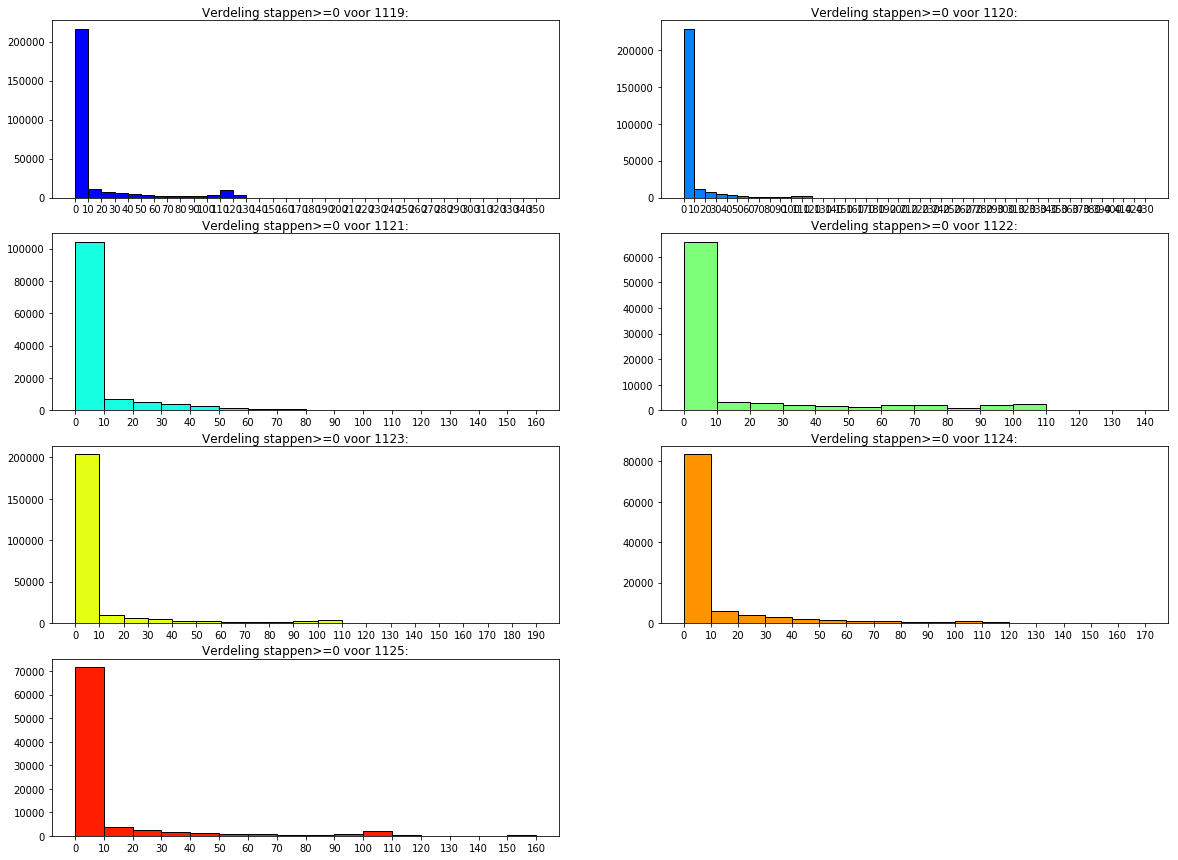

In [10]:
stepsPlots = pl.figure(figsize=(20,15))
cmap = pl.cm.jet  ##I set colomap to 'jet'
norm = mpl.colors.Normalize(vmin=0, vmax=8)

for idx,t in enumerate(fitbits_l):
    treatment_b=FBC_df['T_Nr']==t
    FBCT_df=FBC_df[treatment_b]
    minimum = int(FBCT_df['Stap'].min())
    maximum = int(FBCT_df['Stap'].max())
    pl.subplot(4,2,idx+1)
    exampleColor = cmap( norm(idx+1) )
    x=FBCT_df['Stap']
    xbins=list(range(minimum,maximum,10))
    pl.hist(x, bins=xbins, facecolor=exampleColor,edgecolor='k')
    pl.xticks(xbins)
    pl.title('Verdeling stappen>=0 voor %i:' %t)
pl.show()

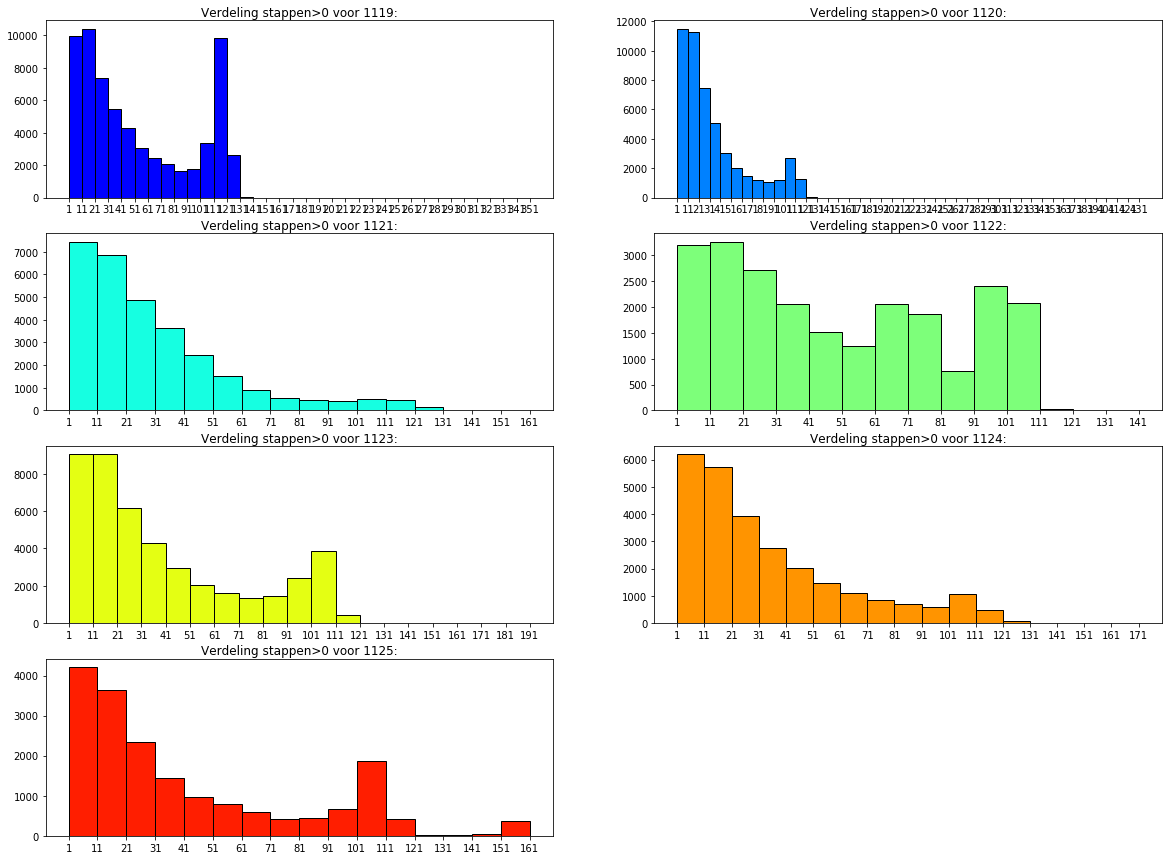

In [11]:
stepsPlots = pl.figure(figsize=(20,15))
cmap = pl.cm.jet  ##I set colomap to 'jet'
norm = mpl.colors.Normalize(vmin=0, vmax=8)

for idx,t in enumerate(fitbits_l):
    treatment_b=FBC_df['T_Nr']==t
    FBCT_df=FBC_df[treatment_b]
    stap_b=FBCT_df['Stap']>0
    FBCTS_df=FBCT_df[stap_b]
    minimum = int(FBCTS_df['Stap'].min())
    maximum = int(FBCTS_df['Stap'].max())
    pl.subplot(4,2,idx+1)
    exampleColor = cmap( norm(idx+1) )
    x=FBCTS_df['Stap']
    xbins=list(range(minimum,maximum,10))
    pl.hist(x, bins=xbins, facecolor=exampleColor,edgecolor='k')
    pl.xticks(xbins)
    pl.title('Verdeling stappen>0 voor %i:' %t)
pl.show()
stepsPlots.savefig('StapHist.png')

## Gemiddeld aantal stappen per uur, per dag en per week

In [12]:
### Bereken totaal aantal stappen per dag.
StepsWeek_df=FBC_df.groupby(['T_Nr', 'week']).mean()['Stap'].reset_index()
StepsDag_df=FBC_df.groupby(['T_Nr', 'dateOnly']).mean()['Stap'].reset_index()
StepsUur_df=FBC_df.groupby(['T_Nr', 'dateOnly','uur']).mean()['Stap'].reset_index()

### Gemiddeld aantal stappen per uur

In [13]:
StepsUur_df.columns

Index(['T_Nr', 'dateOnly', 'uur', 'Stap'], dtype='object')

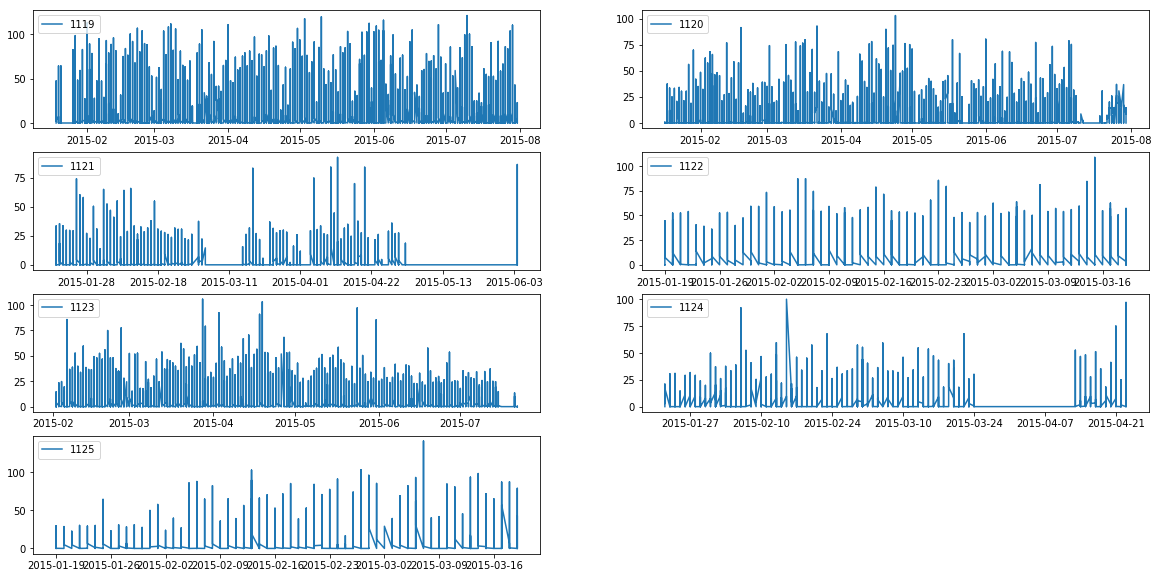

In [14]:
### en maak er eeen plot van.
stepsUur = pl.figure(figsize=(20,10))

for idx,t in enumerate(fitbits_l):
    treatment_b = StepsUur_df['T_Nr']==t
    SUT_df = StepsUur_df[treatment_b]
    pl.subplot(4,2,idx+1)
    pl.plot(SUT_df['dateOnly'],SUT_df['Stap'],label=SUT_df.iloc[0,0])
    pl.legend(loc='upper left')

pl.show()

In [15]:
for t in fitbits_l:
    treatment_b=StepsUur_df['T_Nr']==t
    SUT_df=StepsUur_df[treatment_b]
    stap_b=SUT_df['Stap']>0
    SUTS_df=SUT_df[stap_b]
    print(t)
    print('Mediaan bij alle waarden voor Stap: '+str(SUT_df['Stap'].median()))
    print('Mediaan bij waarden >0 voor Stap: '+str(SUTS_df['Stap'].median()))
    print('Mode bij alle waarden voor Stap: '+str(SUT_df['Stap'].mode()))
    print('Mode bij waarden >0 voor Stap: '+str(SUTS_df['Stap'].mode()))
    print('StDev bij alle waarden voor Stap: '+str(SUT_df['Stap'].std()))
    print('StDev bij waarden >0 voor Stap: '+str(SUTS_df['Stap'].std()))

1119
Mediaan bij alle waarden voor Stap: 3.575
Mediaan bij waarden >0 voor Stap: 9.05
Mode bij alle waarden voor Stap: 0    0.0
dtype: float64
Mode bij waarden >0 voor Stap: 0    0.133333
dtype: float64
StDev bij alle waarden voor Stap: 20.6699584983
StDev bij waarden >0 voor Stap: 22.7070785344
1120
Mediaan bij alle waarden voor Stap: 1.4
Mediaan bij waarden >0 voor Stap: 5.316666666666666
Mode bij alle waarden voor Stap: 0    0.0
dtype: float64
Mode bij waarden >0 voor Stap: 0    0.1
dtype: float64
StDev bij alle waarden voor Stap: 11.2278495822
StDev bij waarden >0 voor Stap: 12.6344620037
1121
Mediaan bij alle waarden voor Stap: 2.575
Mediaan bij waarden >0 voor Stap: 7.683333333333334
Mode bij alle waarden voor Stap: 0    0.0
dtype: float64
Mode bij waarden >0 voor Stap: 0    0.066667
dtype: float64
StDev bij alle waarden voor Stap: 10.559019599
StDev bij waarden >0 voor Stap: 11.347638506
1122
Mediaan bij alle waarden voor Stap: 4.816666666666666
Mediaan bij waarden >0 voor Stap:

### Gemiddeld aantal stappen per dag

In [16]:
StepsDag_df.columns

Index(['T_Nr', 'dateOnly', 'Stap'], dtype='object')

In [17]:
# Dag van de week toevoegen voor histogram. 0 is monday.
StepsDag_df['weekdag'] = pd.to_datetime(StepsDag_df['dateOnly']).dt.dayofweek

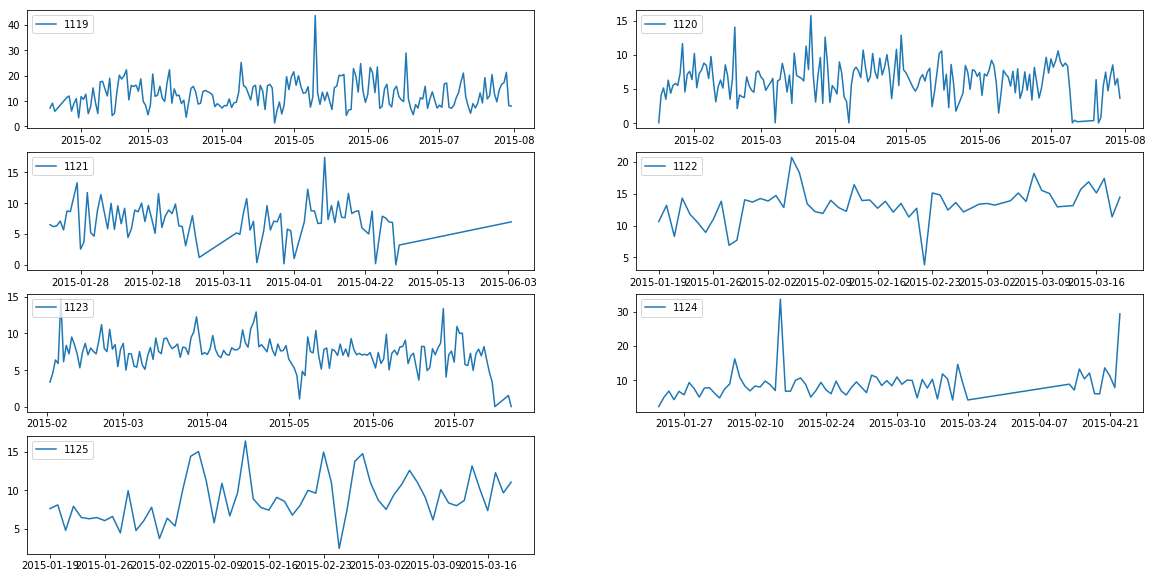

In [18]:
### en maak er eeen plot van.
stepsDag = pl.figure(figsize=(20,10))

for idx,t in enumerate(fitbits_l):
    treatment_b = StepsDag_df['T_Nr']==t
    SDT_df = StepsDag_df[treatment_b]
    pl.subplot(4,2,idx+1)
    pl.plot(SDT_df['dateOnly'],SDT_df['Stap'],label=SDT_df.iloc[0,0])
    pl.legend(loc='upper left')

pl.show()

In [19]:
for t in fitbits_l:
    treatment_b=StepsDag_df['T_Nr']==t
    SDT_df=StepsDag_df[treatment_b]
    stap_b=SDT_df['Stap']>0
    SDTS_df=SDT_df[stap_b]
    print(t)
    print('Mediaan bij alle waarden voor Stap: '+str(SDT_df['Stap'].median()))
    print('Mediaan bij waarden >0 voor Stap: '+str(SDTS_df['Stap'].median()))
    print('Mode bij alle waarden voor Stap: '+str(SDT_df['Stap'].mode()))
    print('Mode bij waarden >0 voor Stap: '+str(SDTS_df['Stap'].mode()))
    print('StDev bij alle waarden voor Stap: '+str(SDT_df['Stap'].std()))
    print('StDev bij waarden >0 voor Stap: '+str(SDTS_df['Stap'].std()))

1119
Mediaan bij alle waarden voor Stap: 12.000694444444445
Mediaan bij waarden >0 voor Stap: 12.000694444444445
Mode bij alle waarden voor Stap: Series([], dtype: float64)
Mode bij waarden >0 voor Stap: Series([], dtype: float64)
StDev bij alle waarden voor Stap: 5.49627153145
StDev bij waarden >0 voor Stap: 5.49627153145
1120
Mediaan bij alle waarden voor Stap: 6.666666666666666
Mediaan bij waarden >0 voor Stap: 6.666666666666666
Mode bij alle waarden voor Stap: 0    7.633333
dtype: float64
Mode bij waarden >0 voor Stap: 0    7.633333
dtype: float64
StDev bij alle waarden voor Stap: 2.65716106449
StDev bij waarden >0 voor Stap: 2.65716106449
1121
Mediaan bij alle waarden voor Stap: 7.040277777777778
Mediaan bij waarden >0 voor Stap: 7.040277777777778
Mode bij alle waarden voor Stap: Series([], dtype: float64)
Mode bij waarden >0 voor Stap: Series([], dtype: float64)
StDev bij alle waarden voor Stap: 2.96244622394
StDev bij waarden >0 voor Stap: 2.96244622394
1122
Mediaan bij alle waa

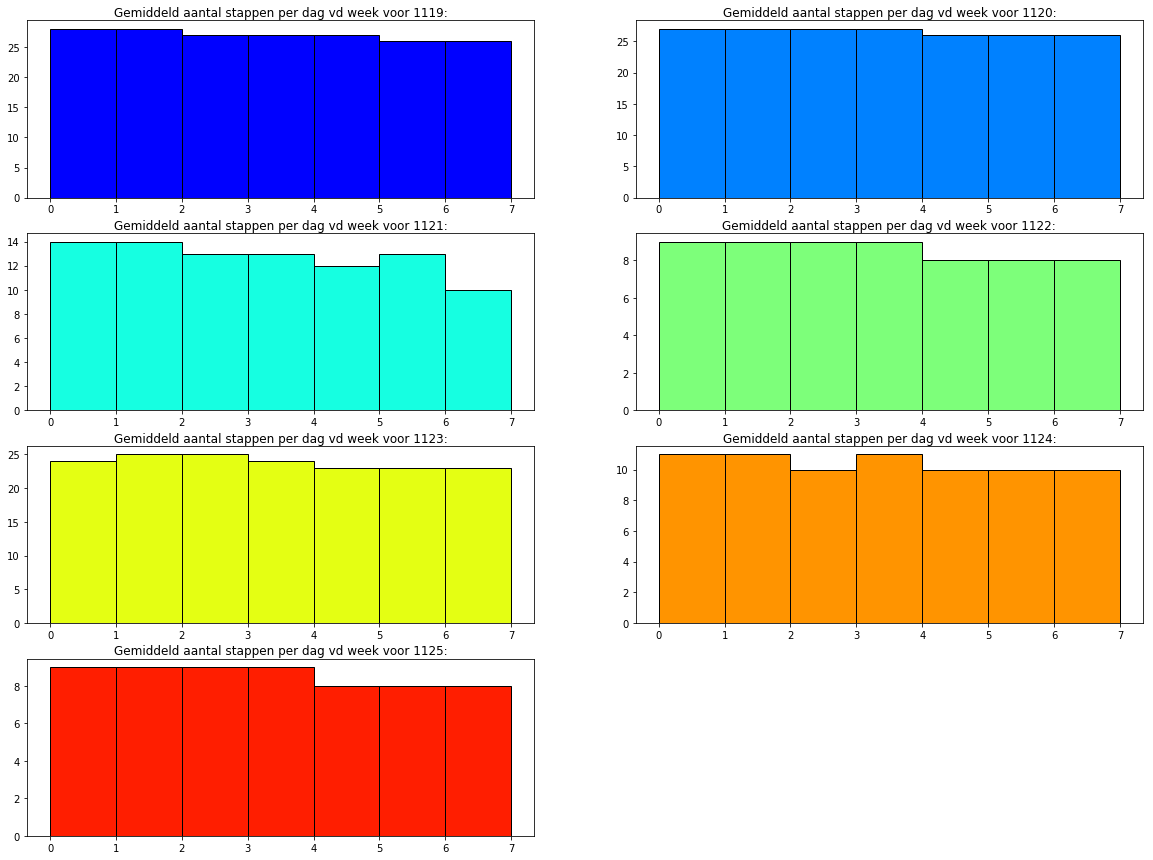

In [20]:
stepsPlots = pl.figure(figsize=(20,15))
cmap = pl.cm.jet  ##I set colomap to 'jet'
norm = mpl.colors.Normalize(vmin=0, vmax=8)

for idx,t in enumerate(fitbits_l):
    treatment_b = StepsDag_df['T_Nr']==t
    SDT_df = StepsDag_df[treatment_b]
    pl.subplot(4,2,idx+1)
    exampleColor = cmap( norm(idx+1) )
    x=SDT_df['weekdag']
    xbins=list(range(8))
    pl.hist(x, bins=xbins, facecolor=exampleColor,edgecolor='k')
    pl.xticks(xbins)
    pl.title('Gemiddeld aantal stappen per dag vd week voor %i:' %t)
pl.show()

### Gemiddeld aantal stappen per week

In [21]:
StepsWeek_df.columns

Index(['T_Nr', 'week', 'Stap'], dtype='object')

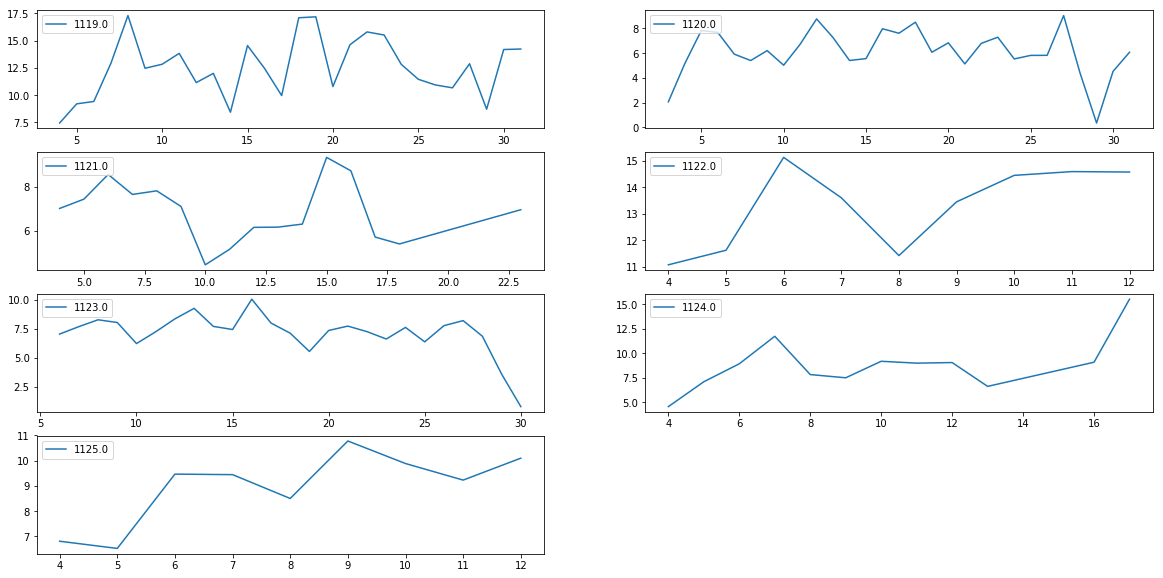

In [22]:
### en maak er eeen plot van.
stepsWeek = pl.figure(figsize=(20,10))

for idx,t in enumerate(fitbits_l):
    treatment_b = StepsWeek_df['T_Nr']==t
    SWT_df = StepsWeek_df[treatment_b]
    pl.subplot(4,2,idx+1)
    pl.plot(SWT_df['week'],SWT_df['Stap'],label=SWT_df.iloc[0,0])
    pl.legend(loc='upper left')

pl.show()

In [23]:
for t in fitbits_l:
    treatment_b=StepsWeek_df['T_Nr']==t
    SWT_df=StepsWeek_df[treatment_b]
    stap_b=SWT_df['Stap']>0
    SWTS_df=SWT_df[stap_b]
    print(t)
    print('Mediaan bij alle waarden voor Stap: '+str(SWT_df['Stap'].median()))
    print('Mediaan bij waarden >0 voor Stap: '+str(SWTS_df['Stap'].median()))
    print('Mode bij alle waarden voor Stap: '+str(SWT_df['Stap'].mode()))
    print('Mode bij waarden >0 voor Stap: '+str(SWTS_df['Stap'].mode()))
    print('StDev bij alle waarden voor Stap: '+str(SWT_df['Stap'].std()))
    print('StDev bij waarden >0 voor Stap: '+str(SWTS_df['Stap'].std()))

1119
Mediaan bij alle waarden voor Stap: 12.644692460317462
Mediaan bij waarden >0 voor Stap: 12.644692460317462
Mode bij alle waarden voor Stap: Series([], dtype: float64)
Mode bij waarden >0 voor Stap: Series([], dtype: float64)
StDev bij alle waarden voor Stap: 2.71084781734
StDev bij waarden >0 voor Stap: 2.71084781734
1120
Mediaan bij alle waarden voor Stap: 6.072222222222222
Mediaan bij waarden >0 voor Stap: 6.072222222222222
Mode bij alle waarden voor Stap: Series([], dtype: float64)
Mode bij waarden >0 voor Stap: Series([], dtype: float64)
StDev bij alle waarden voor Stap: 1.85428138884
StDev bij waarden >0 voor Stap: 1.85428138884
1121
Mediaan bij alle waarden voor Stap: 6.983779761904762
Mediaan bij waarden >0 voor Stap: 6.983779761904762
Mode bij alle waarden voor Stap: Series([], dtype: float64)
Mode bij waarden >0 voor Stap: Series([], dtype: float64)
StDev bij alle waarden voor Stap: 1.35233565043
StDev bij waarden >0 voor Stap: 1.35233565043
1122
Mediaan bij alle waarden

## Wanneer worden 10.000 stappen bereikt?

In [24]:
t=[FBC_df[FBC_df['T_Nr']==t].groupby(['dateOnly']).cumsum()['Stap'] for t in fitbits_l]

In [25]:
FBC_df['cumsum']=[item for sublist in t for item in sublist]

In [26]:
TiSt_df=FBC_df[FBC_df['cumsum']>=10000].groupby(['T_Nr','dateOnly']).first()[['Datum','weekdag','cumsum','uur']].reset_index()

In [27]:
TiSt_df['tijd']=TiSt_df['Datum'].dt.time

In [28]:
TiSt_df

,T_Nr,dateOnly,Datum,weekdag,cumsum,uur,tijd
0,1119,2015-01-19,2015-01-19 22:35:00,0,10061.0,22,22:35:00
1,1119,2015-01-20,2015-01-20 16:32:00,1,10078.0,16,16:32:00
2,1119,2015-01-26,2015-01-26 20:55:00,0,10111.0,20,20:55:00
3,1119,2015-01-27,2015-01-27 16:56:00,1,10030.0,16,16:56:00
4,1119,2015-01-29,2015-01-29 15:33:00,3,10007.0,15,15:33:00
5,1119,2015-01-30,2015-01-30 16:07:00,4,10031.0,16,16:07:00
6,1119,2015-02-01,2015-02-01 09:36:00,6,10021.0,9,09:36:00
7,1119,2015-02-02,2015-02-02 17:08:00,0,10056.0,17,17:08:00
8,1119,2015-02-03,2015-02-03 12:57:00,1,10019.0,12,12:57:00
9,1119,2015-02-05,2015-02-05 21:47:00,3,10043.0,21,21:47:00


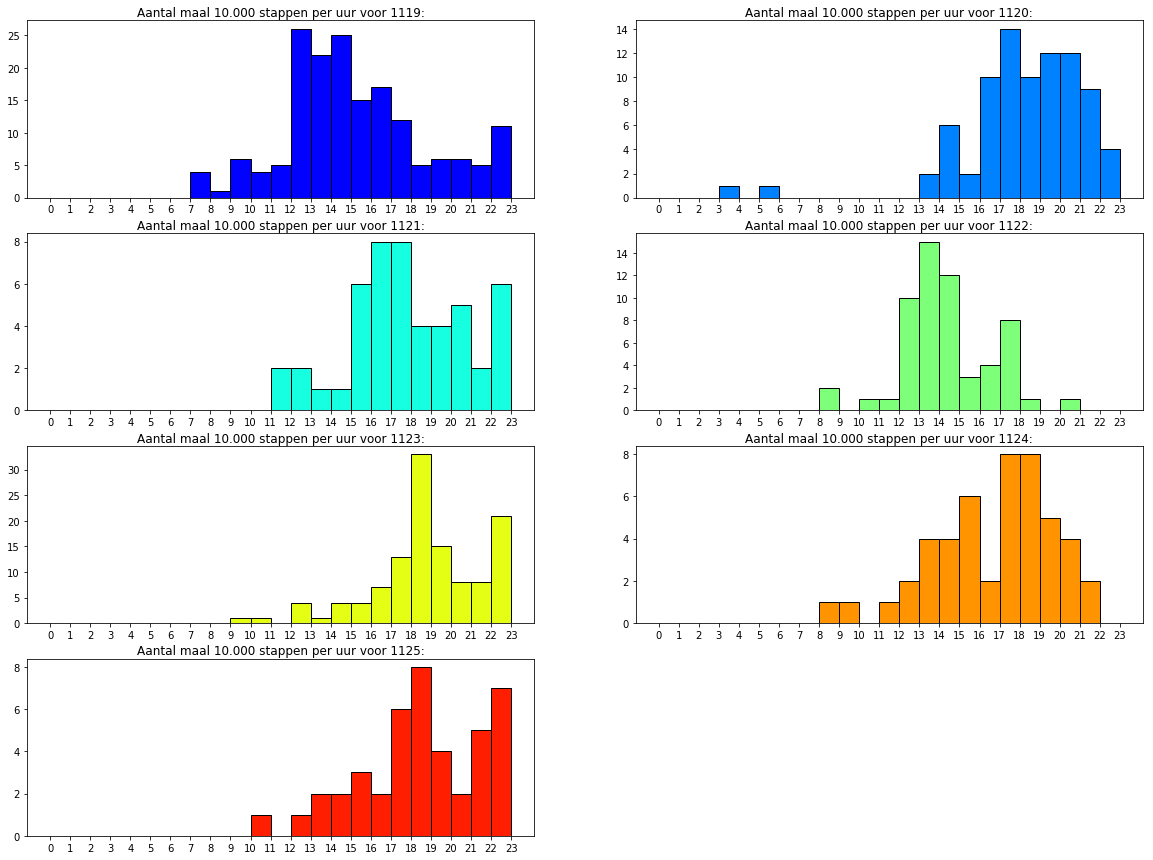

In [29]:
stepsPlots = pl.figure(figsize=(20,15))
cmap = pl.cm.jet  ##I set colomap to 'jet'
norm = mpl.colors.Normalize(vmin=0, vmax=8)

for idx,t in enumerate(fitbits_l):
    treatment_b = TiSt_df['T_Nr']==t
    TiStT_df = TiSt_df[treatment_b]
    pl.subplot(4,2,idx+1)
    exampleColor = cmap( norm(idx+1) )
    x=TiStT_df['uur']
    xbins=list(range(24))
    pl.hist(x, bins=xbins, facecolor=exampleColor,edgecolor='k')
    pl.xticks(xbins)
    pl.title('Aantal maal 10.000 stappen per uur voor %i:' %t)
pl.show()

En hoe ziet het patroon er uit over alleen de werkdagen?

In [30]:
TiStWd_df=TiSt_df.ix[(TiSt_df['weekdag']==0) |(TiSt_df['weekdag']==1) |(TiSt_df['weekdag']==2) |(TiSt_df['weekdag']==3) |(TiSt_df['weekdag']==4)] 

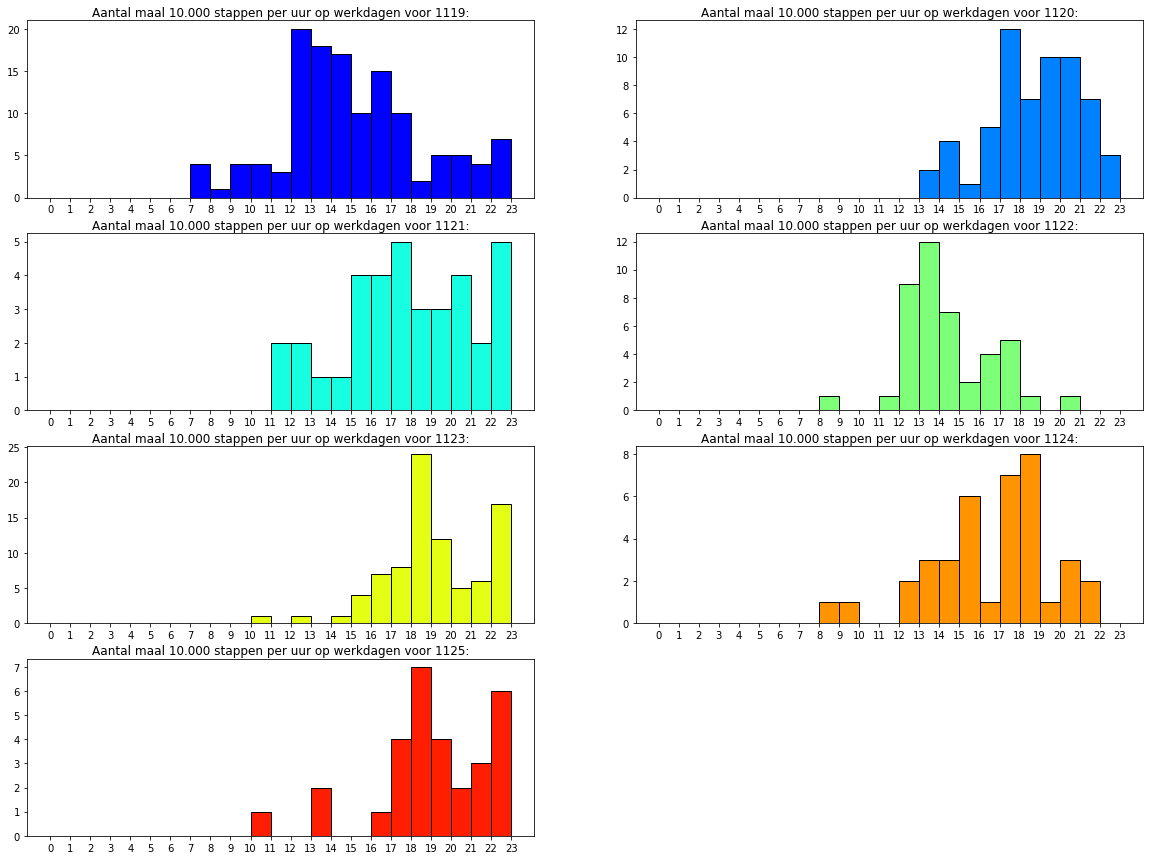

In [31]:
stepsPlots = pl.figure(figsize=(20,15))
cmap = pl.cm.jet  ##I set colomap to 'jet'
norm = mpl.colors.Normalize(vmin=0, vmax=8)

for idx,t in enumerate(fitbits_l):
    treatment_b = TiStWd_df['T_Nr']==t
    TiStWdT_df = TiStWd_df[treatment_b]
    pl.subplot(4,2,idx+1)
    exampleColor = cmap( norm(idx+1) )
    x=TiStWdT_df['uur']
    xbins=list(range(24))
    pl.hist(x, bins=xbins, facecolor=exampleColor,edgecolor='k')
    pl.xticks(xbins)
    pl.title('Aantal maal 10.000 stappen per uur op werkdagen voor %i:' %t)
pl.show()

## Inzicht uit histograms
Verschillende patronen per kanidaat over de dag. Is het mogelijk om op basis van het 'looppatroon' te voorspellen welke kandidaat het is?

Verder op de data geschikt maken om dit uit te kunnen voeren. Eerst nog even kijken naar de kansen op bereiken van 10.000 stappen.

In [32]:
# Selecteer de laatste regel. Deze bevat na de cumsum het aantal gemaakte stappen per dag.
MaxStap_df=FBC_df.groupby(['T_Nr','dateOnly']).last()[['Datum','weekdag','cumsum','uur']].reset_index()

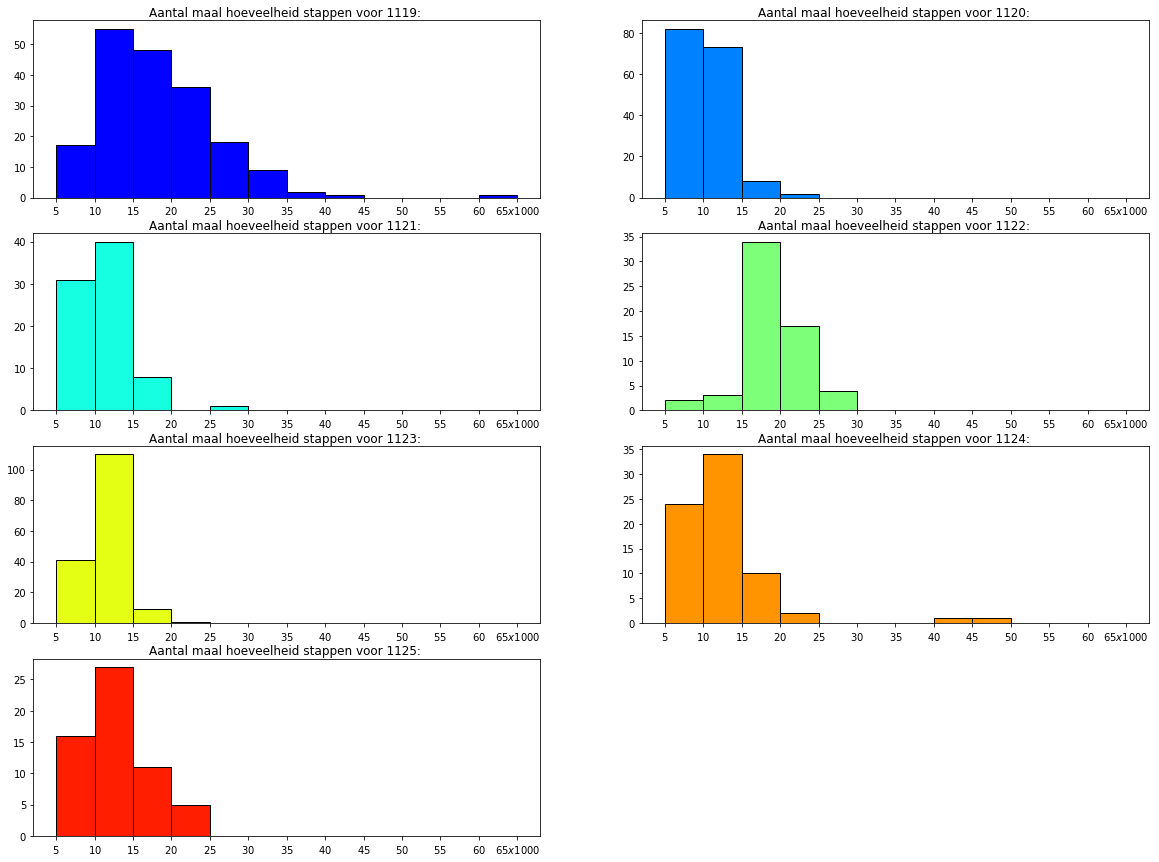

In [33]:
# plot hoe vaak een aantal stappen als maximaal wordt behaald met als klassen voor de stappen:
# 5000,10000,15000,20000,25000,30000,35000,40000,45000,50000,55000,60000,65000
stepsPlots = pl.figure(figsize=(20,15))
cmap = pl.cm.jet  ##I set colomap to 'jet'
norm = mpl.colors.Normalize(vmin=0, vmax=8)

for idx,t in enumerate(fitbits_l):
    treatment_b = MaxStap_df['T_Nr']==t
    MaxStapT_df = MaxStap_df[treatment_b]
    pl.subplot(4,2,idx+1)
    exampleColor = cmap( norm(idx+1) )
    x=MaxStapT_df['cumsum']
    xbins=[5000,10000,15000,20000,25000,30000,35000,40000,45000,50000,55000,60000,65000]
    pl.hist(x, bins=xbins, facecolor=exampleColor,edgecolor='k')
    pl.xticks([5000,10000,15000,20000,25000,30000,35000,40000,45000,50000,55000,60000,65000],
       [r'$5$', r'$10$', r'$15$', r'$20$', r'$25$', r'$30$', r'$35$', r'$40$', r'$45$', r'$50$', r'$55$',  r'$60$', r'$65   x1000$'])
    pl.title('Aantal maal hoeveelheid stappen voor %i: '%t)
pl.show()

In [34]:
for t in fitbits_l:
    treatment_b = MaxStap_df['T_Nr']==t
    MaxStapT_df = MaxStap_df[treatment_b]
    values=MaxStapT_df['cumsum']
    bins=[5000,10000,15000,20000,25000,30000,35000,40000,45000,50000,55000,60000,65000]
    freq, bins = np.histogram(values, bins)
    print(freq)


[17 55 48 36 18  9  2  1  0  0  0  1]
[82 73  8  2  0  0  0  0  0  0  0  0]
[31 40  8  0  1  0  0  0  0  0  0  0]
[ 2  3 34 17  4  0  0  0  0  0  0  0]
[ 41 110   9   1   0   0   0   0   0   0   0   0]
[24 34 10  2  0  0  0  1  1  0  0  0]
[16 27 11  5  0  0  0  0  0  0  0  0]


In [35]:
[MaxStap_df[MaxStap_df['T_Nr']==t]['cumsum'] for t in fitbits_l]

[0      10397.0
 1      13186.0
 2       8546.0
 3      16322.0
 4      17261.0
 5       8725.0
 6      12929.0
 7      15711.0
 8       4894.0
 9      16861.0
 10     15323.0
 11     18248.0
 12      7276.0
 13     11155.0
 14     21820.0
 15     13747.0
 16      7315.0
 17     25206.0
 18     25534.0
 19     21222.0
 20     17281.0
 21     27255.0
 22      6149.0
 23      7464.0
 24     19608.0
 25     28997.0
 26     26787.0
 27     28736.0
 28     32025.0
 29     15023.0
         ...   
 159    10819.0
 160    24046.0
 161    24560.0
 162    10854.0
 163    10312.0
 164    11885.0
 165    16174.0
 166    19160.0
 167    25338.0
 168    30209.0
 169    16713.0
 170    11503.0
 171     7451.0
 172    12915.0
 173    10466.0
 174    13185.0
 175    18966.0
 176    13272.0
 177    27612.0
 178    15575.0
 179    17441.0
 180    29343.0
 181    18491.0
 182    13928.0
 183    20589.0
 184    23808.0
 185    24726.0
 186    30601.0
 187    11831.0
 188    11484.0
 Name: cumsum, dtype: fl

In [36]:
bins=[5000,10000,15000,20000,25000,30000,35000,40000,45000,50000,55000,60000,65000]
freq_l=[np.histogram(MaxStap_df[MaxStap_df['T_Nr']==t]['cumsum'],bins) for t in fitbits_l]

In [37]:
freq_l

[(array([17, 55, 48, 36, 18,  9,  2,  1,  0,  0,  0,  1], dtype=int64),
  array([ 5000, 10000, 15000, 20000, 25000, 30000, 35000, 40000, 45000,
         50000, 55000, 60000, 65000])),
 (array([82, 73,  8,  2,  0,  0,  0,  0,  0,  0,  0,  0], dtype=int64),
  array([ 5000, 10000, 15000, 20000, 25000, 30000, 35000, 40000, 45000,
         50000, 55000, 60000, 65000])),
 (array([31, 40,  8,  0,  1,  0,  0,  0,  0,  0,  0,  0], dtype=int64),
  array([ 5000, 10000, 15000, 20000, 25000, 30000, 35000, 40000, 45000,
         50000, 55000, 60000, 65000])),
 (array([ 2,  3, 34, 17,  4,  0,  0,  0,  0,  0,  0,  0], dtype=int64),
  array([ 5000, 10000, 15000, 20000, 25000, 30000, 35000, 40000, 45000,
         50000, 55000, 60000, 65000])),
 (array([ 41, 110,   9,   1,   0,   0,   0,   0,   0,   0,   0,   0], dtype=int64),
  array([ 5000, 10000, 15000, 20000, 25000, 30000, 35000, 40000, 45000,
         50000, 55000, 60000, 65000])),
 (array([24, 34, 10,  2,  0,  0,  0,  1,  1,  0,  0,  0], dtype=int6

In [38]:
# De kans dat een kandidaat x-aantal stappen maakt
[round(elem,0) for lijst in [((freq[0]/freq[0].sum())*100).tolist() for freq in freq_l] for elem in lijst]

[9.0,
 29.0,
 26.0,
 19.0,
 10.0,
 5.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 50.0,
 44.0,
 5.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 39.0,
 50.0,
 10.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 3.0,
 5.0,
 57.0,
 28.0,
 7.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 25.0,
 68.0,
 6.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 33.0,
 47.0,
 14.0,
 3.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 27.0,
 46.0,
 19.0,
 8.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

De kans op bewegen voor een weekdag bepalen (bijv. hoe groot is de kans dat de kandidaat op maandag > 15.000 stappen maakt)
- sum van stappen per type dag.

## Data gereed maken voor machine learning
De data 'kantelen', zodat de stappen per uur kolommen worden. Voor elk uur dus een kolom.



In [76]:
# Werkdagen set aanmaken uit geschoonde dataset.
FBCWd_df=FBC_df.ix[(FBC_df['weekdag']!=5) & (FBC_df['weekdag']!=6)]

In [77]:
# Kandidaat 1120 selecteren
treatment_b=FBCWd_df['T_Nr']==1120
T1120_df=FBCWd_df[treatment_b]

In [78]:
# Werkuren selecteren
T1120werkuren_df=T1120_df.ix[(T1120_df['uur']>=8) & (T1120_df['uur']<=18)].copy()

In [79]:
T1120dag_df=pd.pivot_table(T1120werkuren_df,index=['week','weekdag'],values=['Stap'],aggfunc=np.sum)
T1120uur_df=pd.pivot_table(T1120werkuren_df,index=['week','weekdag','uur'],values=['Stap'],aggfunc=np.sum)

In [80]:
#Verwijder eerste twee weken (week 4 en 5) omdat dat de weken zonder coaching zijn geweest.
T1120dag_df=T1120dag_df.reset_index()
T1120dag_df=T1120dag_df.ix[(T1120dag_df['week']>5)].copy()

T1120uur_df=T1120uur_df.reset_index()
T1120uur_df=T1120uur_df.ix[(T1120uur_df['week']>5)].copy()

In [81]:
T1120uur_df

,week,weekdag,uur,Stap
110,6,0,8,349.0
111,6,0,9,350.0
112,6,0,10,218.0
113,6,0,11,386.0
114,6,0,12,202.0
115,6,0,13,108.0
116,6,0,14,0.0
117,6,0,15,417.0
118,6,0,16,1899.0
119,6,0,17,1933.0


In [82]:
T1120uur_df['class']=0
for i in range(len(T1120uur_df)):
    weekdag=T1120uur_df.iloc[i]['weekdag']
    week=T1120uur_df.iloc[i]['week']
    stap=np.float(T1120dag_df.ix[(T1120dag_df['week']==week) & (T1120dag_df['weekdag']==weekdag)]['Stap'])
    #ttStap=np.float(ttMean_df['Stap'][ttMean_df['weekdag']==weekdag])
    if stap > 8000:
        T1120uur_df.iloc[i,4]=1

In [83]:
T1120uur_df.head()

,week,weekdag,uur,Stap,class
110,6,0,8,349.0,0
111,6,0,9,350.0,0
112,6,0,10,218.0,0
113,6,0,11,386.0,0
114,6,0,12,202.0,0


In [94]:
# Ochtend en lunchuren selecteren
T1120OLuren_df=T1120uur_df.ix[(T1120uur_df['uur']>=8) & (T1120uur_df['uur']<=13)].copy()

In [96]:
# uren omzetten naar features
T1120uurclass_df=pd.pivot_table(T1120OLuren_df,index=['week','weekdag','class'],columns=['uur'],values=['Stap'])
T1120uurclass_df.reset_index(level=['class'], inplace=True)

Het kandidaatnummer (of treatment number) wordt de klasse. De uren vormen de dimensies

In [97]:
y_coachingdata=np.array(T1120uurclass_df['class'])
X_coachingdata=np.array(T1120uurclass_df[['Stap']])

In [99]:
X_coachingdata

array([[  3.49000000e+02,   3.50000000e+02,   2.18000000e+02,
          3.86000000e+02,   2.02000000e+02,   1.08000000e+02],
       [  1.15000000e+03,   5.43000000e+02,   7.50000000e+01,
          1.44000000e+02,   3.74000000e+03,   8.62000000e+02],
       [  1.77000000e+02,   3.45300000e+03,   7.50000000e+02,
          7.83000000e+02,   1.72000000e+03,   2.00400000e+03],
       [  2.28600000e+03,   2.67000000e+02,   2.23000000e+02,
          1.27000000e+02,   4.10200000e+03,   2.79000000e+02],
       [  2.16200000e+03,   0.00000000e+00,   1.80000000e+01,
          3.60000000e+01,   3.94200000e+03,   4.91000000e+02],
       [  1.69200000e+03,   1.20000000e+02,   3.92000000e+02,
          1.24000000e+02,   2.72700000e+03,   1.32000000e+03],
       [  1.02700000e+03,   5.60000000e+01,   1.06000000e+02,
          1.74000000e+02,   6.20000000e+01,   1.10000000e+01],
       [  0.00000000e+00,   4.03000000e+02,   3.12000000e+02,
          1.62800000e+03,   1.50000000e+03,   9.60000000e+02],


In [100]:
pickle.dump([X_coachingdata,y_coachingdata] , open( "Fitbit_coaching1120.p", "wb" ) )